In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-10-26 19:44:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.6’

data.csv.6          100%[===================>]   1.41M  5.05MB/s    in 0.3s    

2025-10-26 19:44:58 (5.05 MB/s) - ‘data.csv.6’ saved [1475504/1475504]



In [4]:
df=pd.read_csv('data.csv')

In [5]:
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
#data cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_')
strings = list(df.dtypes[df.dtypes=='object'].index)
for col in strings:
    df[col]=df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


__Exploratory Data Analysis__

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

__Distribution of price__

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

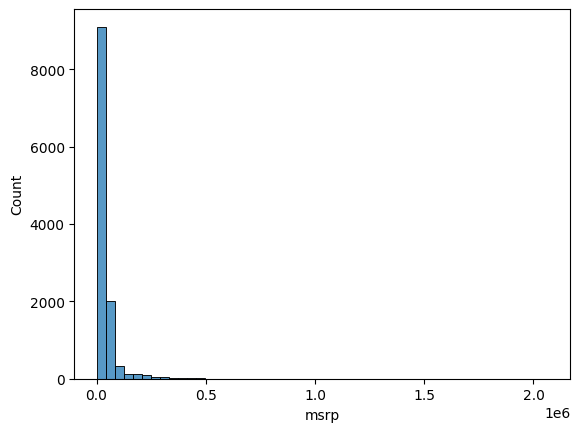

In [10]:
sns.histplot(df.msrp, bins=50) #LONG TAIL

In [11]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

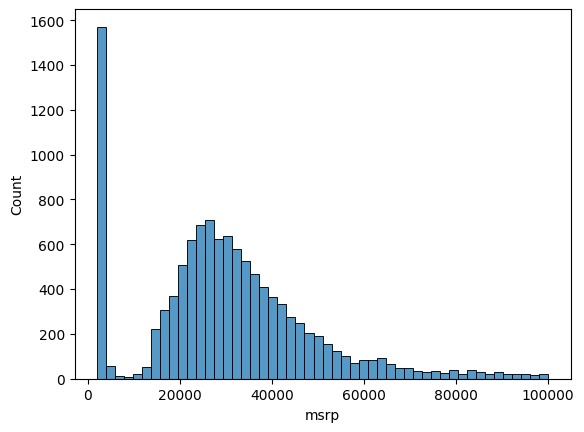

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50) #LONG TAIL

In [13]:
price_logs = np.log1p(df.msrp)

In [14]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

__Validation Framework__

In [15]:
n=int(len(df))

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [16]:
n, n_train

(11914, 7150)

In [57]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [58]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [19]:
idx = np.arange(n)

In [20]:
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [21]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [68]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [73]:
len(y_train)

7150

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

## 2.5 Linear regression

In [24]:
df_train.iloc[10]

make                               kia
model                          sorento
year                              2017
engine_fuel_type      regular_unleaded
engine_hp                        290.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category              crossover
vehicle_size                   midsize
vehicle_style                  4dr_suv
highway_mpg                         25
city_mpg                            18
popularity                        1720
Name: 9844, dtype: object

In [25]:
xi = [453, 11, 86]
w0 = 0
w = [1, 1, 1]


In [26]:
def linear_regression(xi):
    #do something
    n=len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j]+xi[j]
        
    return pred;

In [27]:
linear_regression(xi)

553

In [28]:
## Linear regression vector form

In [29]:
def dot(xi, w):
    n = len(xi)

    res=0.0

    for j in range(n):
        res+=xi[j]*w[j]

    return res

In [30]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [31]:
linear_regression(xi)

550.0

## Training a linear regression model

In [32]:
## g(X) = yp

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X



array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

## Gram Matrix

In [33]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
X = np.column_stack([ones, X])

In [35]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [36]:
XTX_inv =np.linalg.inv(XTX)

In [37]:
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [38]:
y=[10000,20000,15000,25000,10000,20000,15000,25000,12000]

In [39]:
w_full= XTX_inv.dot(X.T).dot(y) ## (XT X)^-1 . XT . y

In [40]:
w0= w_full[0]
w0

np.float64(30006.77669255554)

In [76]:
def train_linear_regression(X, y):
    ones=np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv =np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y) ## (XT X)^-1 . XT . y

    return w_full[0], w_full[1:]

In [45]:
train_linear_regression(X, y)

(np.float64(30006.77669255554),
 array([ -22.77425287, -257.69412959,   -2.3012064 ]))

## Car price baseline model

In [55]:
df_train.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [62]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
7145,160.0,6.0,18,14,586
7146,160.0,6.0,18,14,586
7147,365.0,6.0,20,15,61
7148,365.0,6.0,19,15,61


In [78]:
X_train = df_train[base].values

In [79]:
X_train

array([[ 335.,    6.,   26.,   19., 3916.],
       [ 300.,    6.,   28.,   19., 3916.],
       [ 300.,    6.,   28.,   20., 3916.],
       ...,
       [ 365.,    6.,   20.,   15.,   61.],
       [ 365.,    6.,   19.,   15.,   61.],
       [ 365.,    6.,   22.,   16.,   61.]], shape=(7150, 5))

In [61]:
df_test[base].isnull().sum()

engine_hp           5
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [80]:
## fill them with zero
X_train = df_train[base].fillna(0)
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
7145,160.0,6.0,18,14,586
7146,160.0,6.0,18,14,586
7147,365.0,6.0,20,15,61
7148,365.0,6.0,19,15,61


In [83]:
# g(xi) = w0 + xi1.w1 + xi2.w2 +.. + xin.wn
# if xi1=0 -> g(xi) = w0 + xi2.w2
w0, w = train_linear_regression(X_train, y_train)

In [84]:
X_train.dot(w)

0       2.792174
1       2.494961
2       2.507600
3       1.827082
4       1.827082
          ...   
7145    1.012679
7146    1.012679
7147    2.981491
7148    2.966287
7149    3.024538
Length: 7150, dtype: float64

In [85]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

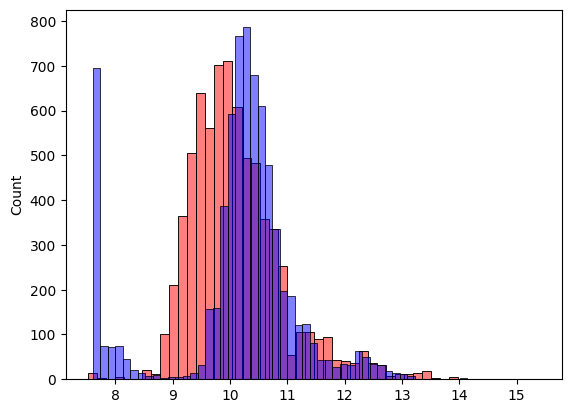

In [88]:
sns.histplot(y_pred, color='red',alpha=0.5, bins=50)
sns.histplot(y_train, color='blue',alpha=0.5, bins=50)

## RMSE

In [89]:
## Root mean square error
# RMSE = root ( 1/m *sum (g(xi) - yi)^2)

def rmse(y, y_pred):
    error =y - y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [90]:
rmse(y_train, y_pred)

np.float64(0.7764354792432974)

## Validating the model

In [92]:
def prepare_X(df):
    df_num = df[base]
    df_num=df_num.fillna(0)
    X = df_num.values
    return X

In [93]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


np.float64(0.7769971249567754)

In [ ]:
## Simple feature engineering